# Visualização de dados financeiros

Importando Bibliotecas

In [14]:
import pandas as pd
import numpy as np
from pandas_datareader import data 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf
import math
from scipy import stats

In [3]:
gol_df = yf.download('GOLL4.SA', start='2023-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


In [4]:
gol_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,7.28,7.28,6.88,6.88,6.88,5078800
2023-01-03,6.90,7.11,6.58,6.63,6.63,9913400
2023-01-04,6.67,6.95,6.59,6.84,6.84,9380100
2023-01-05,6.89,7.36,6.78,7.35,7.35,8957300
2023-01-06,7.30,7.65,7.25,7.62,7.62,8020000
...,...,...,...,...,...,...
2023-12-21,8.70,9.07,8.66,9.06,9.06,7622100
2023-12-22,9.10,9.17,8.87,9.14,9.14,5038000
2023-12-26,9.14,9.18,9.02,9.16,9.16,3452000


In [5]:
gol_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2023-01-02 to 2023-12-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       248 non-null    float64
 1   High       248 non-null    float64
 2   Low        248 non-null    float64
 3   Close      248 non-null    float64
 4   Adj Close  248 non-null    float64
 5   Volume     248 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.6 KB


In [6]:
gol_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,8.072944,8.305927,7.858427,8.068508,8.068508,1.264326e+07
std,1.714868,1.735870,1.676238,1.709084,1.709084,6.541328e+06
min,5.090000,5.230000,5.030000,5.060000,5.060000,3.452000e+06
25%,6.817500,7.037500,6.597500,6.800000,6.800000,8.823750e+06
50%,7.685000,7.950000,7.445000,7.675000,7.675000,1.152495e+07
75%,9.075000,9.172500,8.862500,9.045000,9.045000,1.446635e+07
max,13.300000,13.530000,13.090000,13.190000,13.190000,6.724200e+07


In [7]:
# Cálculo do momento em que ocorreu o maior e menor preço de fechamento
print(gol_df['Close'].idxmax()) 
print(gol_df['Close'].idxmin())

2023-07-05 00:00:00
2023-03-02 00:00:00


Construção de bases de dados de mais ações:

In [8]:
# Empresas alvo:
empresas = ['GOLL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']
df = pd.DataFrame()

for empresa in empresas:
    df[empresa] = yf.download(empresa, start='2019-01-01', end='2023-12-31')['Close']

df = df.rename(columns={'GOLL4.SA': 'GOL', 'CVCB3.SA': 'CVC', 'WEGE3.SA': 'WEGE', 'MGLU3.SA': 'MGLU', 'TOTS3.SA': 'TOTS', 'BOVA11.SA': 'BOVA'})

df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,GOL,CVC,WEGE,MGLU,TOTS,BOVA
Date,,,,,,
2019-01-02,25.450001,61.099998,8.990000,5.812187,9.531889,87.900002
2019-01-03,25.629999,60.709999,9.195000,5.750000,9.751472,88.000000
2019-01-04,25.000000,59.950001,9.300000,5.575000,10.020960,88.500000
2019-01-07,23.900000,60.700001,9.155000,5.661562,9.804704,88.480003
2019-01-08,23.590000,58.709999,9.080000,5.615937,9.405462,88.830002
...,...,...,...,...,...,...
2023-12-21,9.060000,3.960000,36.389999,2.090000,33.349998,128.350006
2023-12-22,9.140000,3.960000,36.509998,2.120000,32.849998,128.940002
2023-12-26,9.160000,3.980000,36.720001,2.110000,33.529999,129.649994


Visualização de gráficos

Histograma para verificar a concentração de preços da ação

<Axes: xlabel='GOL', ylabel='Count'>

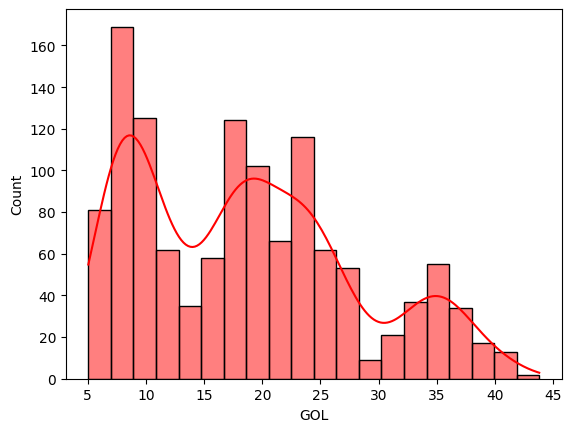

In [11]:
sns.histplot(df['GOL'], kde=True, color='red',bins=20)

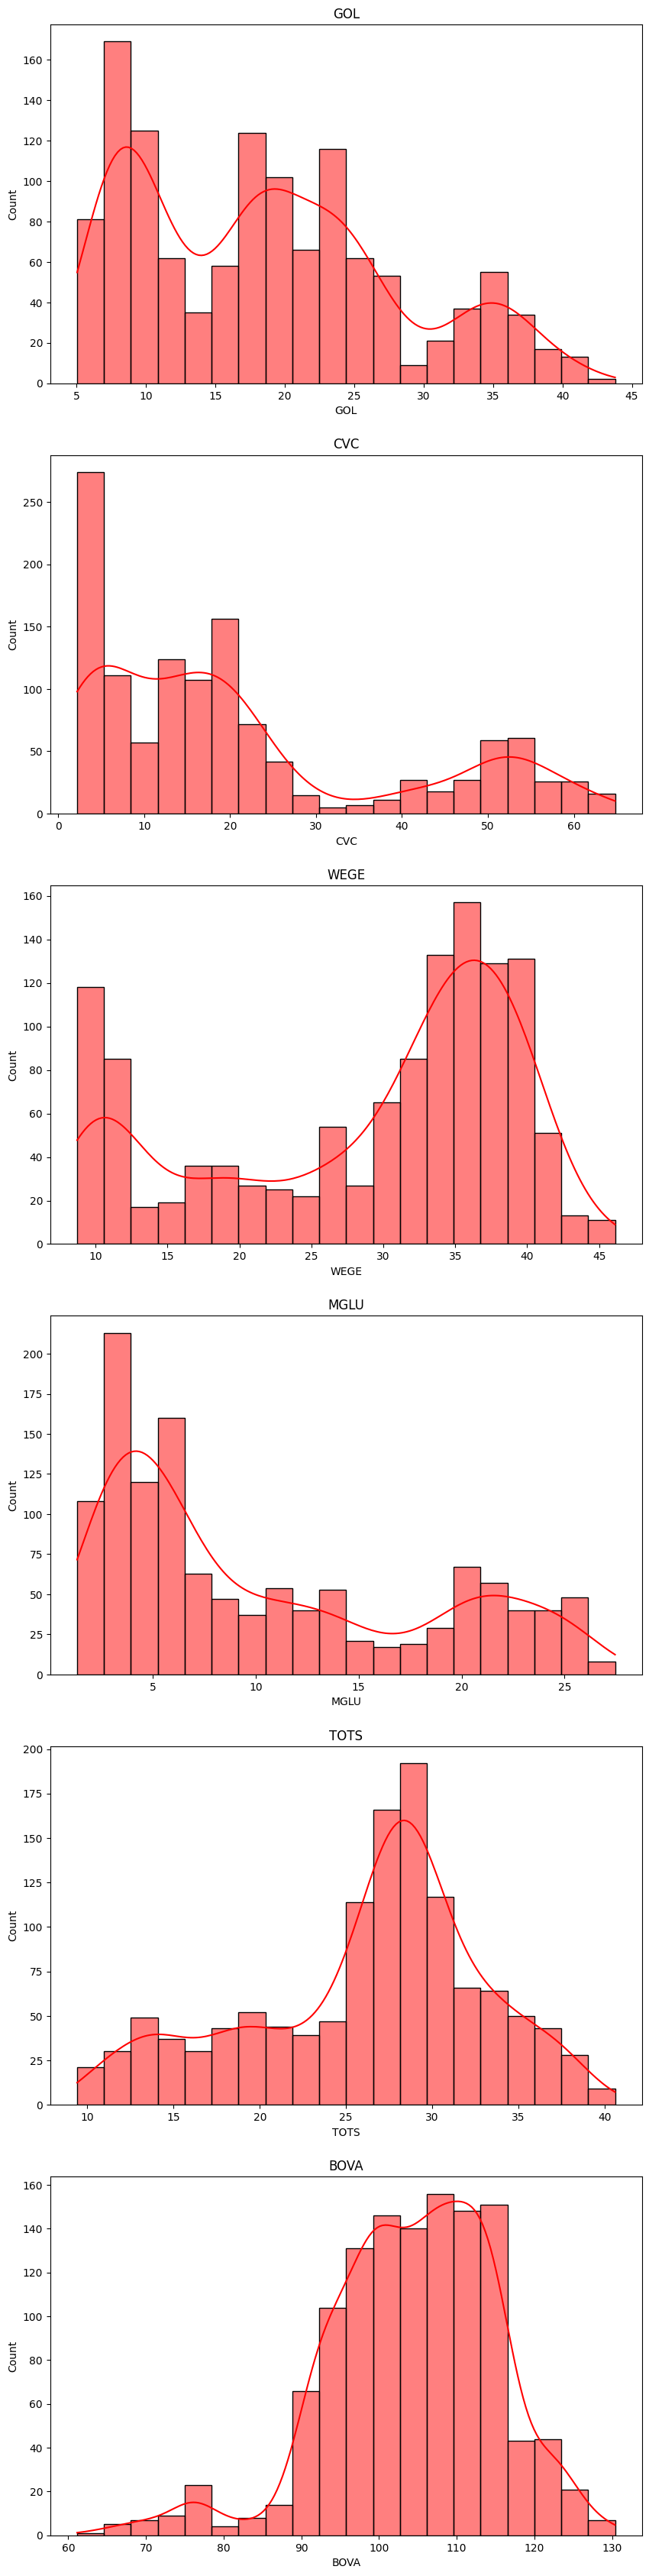

In [39]:
plt.figure(figsize=(10,50))
for i in np.arange(1,len(empresas)+1):
    plt.subplot(7, 1, i)
    sns.histplot(df[df.columns[i-1]], kde=True, color='red',bins=20)
    plt.title(df.columns[i-1])

Boxplot para analisar outliers:

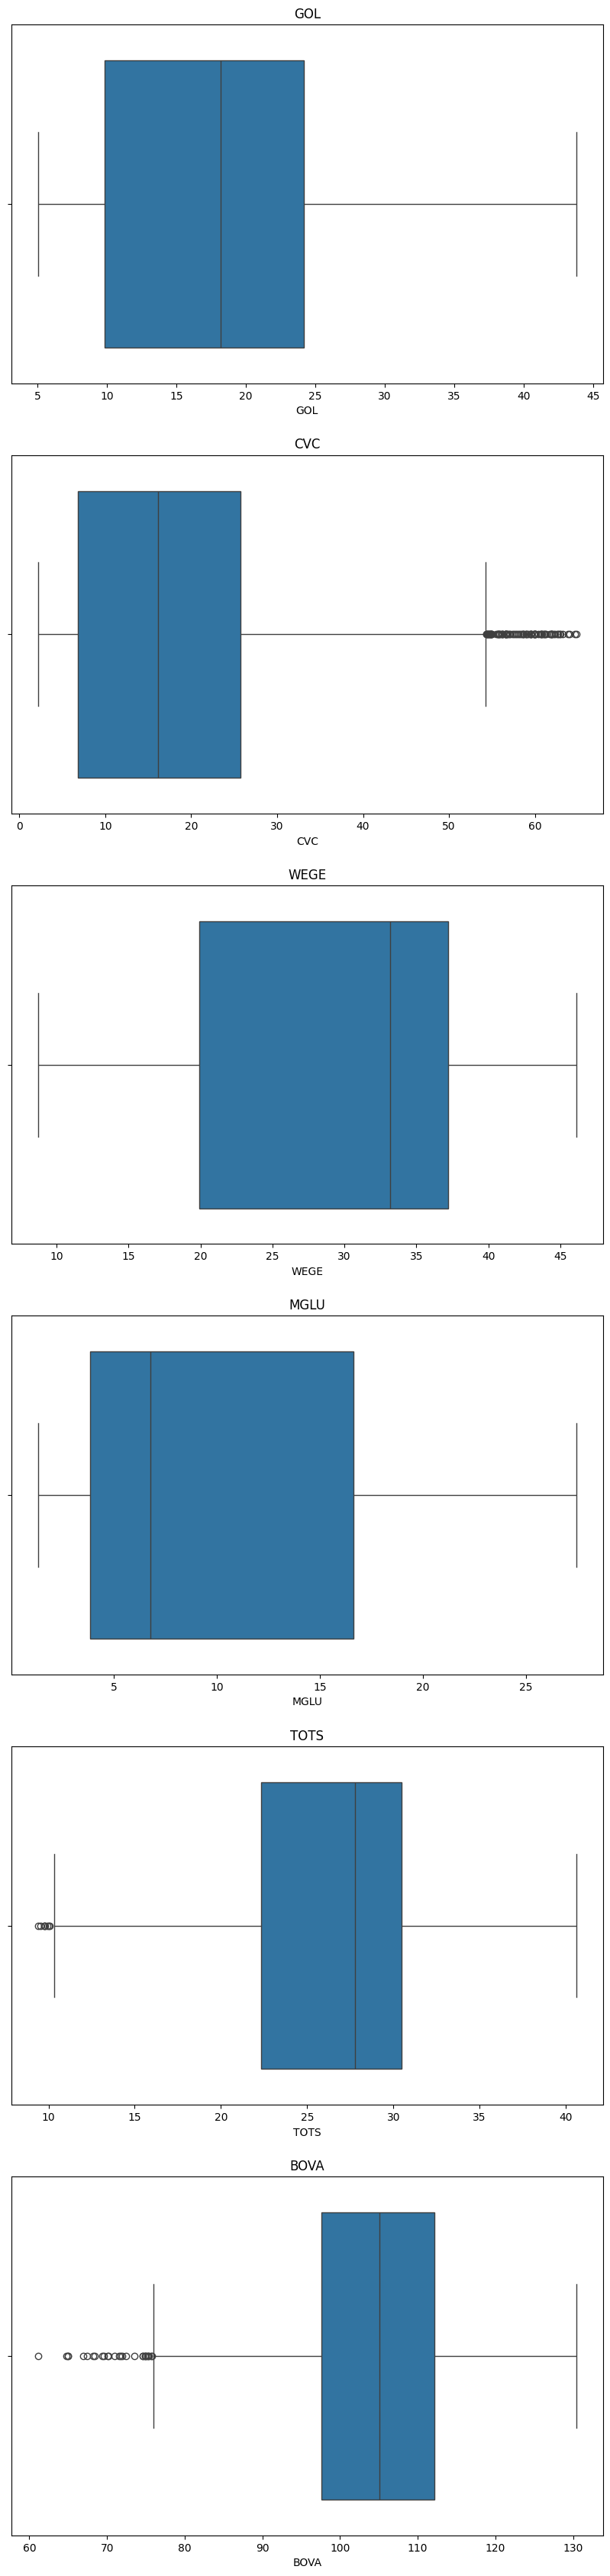

In [40]:
plt.figure(figsize=(10,50))
for i in np.arange(1,len(empresas)+1):
    plt.subplot(7, 1, i)
    sns.boxplot(x = df[df.columns[i-1]])    
    plt.title(df.columns[i-1])

Gráfico de linhas para análise da variação do preço

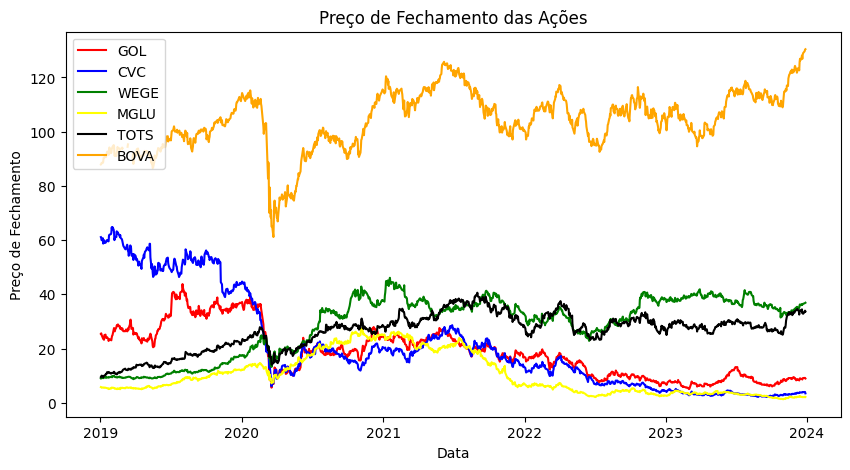

In [41]:
# Gráfico de Linha com Matplotlib:
plt.figure(figsize=(10,5))
plt.plot(df['GOL'], color='red')
plt.plot(df['CVC'], color='blue')
plt.plot(df['WEGE'], color='green')
plt.plot(df['MGLU'], color='yellow')
plt.plot(df['TOTS'], color='black')
plt.plot(df['BOVA'], color='orange')
plt.legend(['GOL', 'CVC', 'WEGE', 'MGLU', 'TOTS', 'BOVA'], loc='upper left')
plt.title('Preço de Fechamento das Ações')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.show()



Normalização para a comparação justa de ações

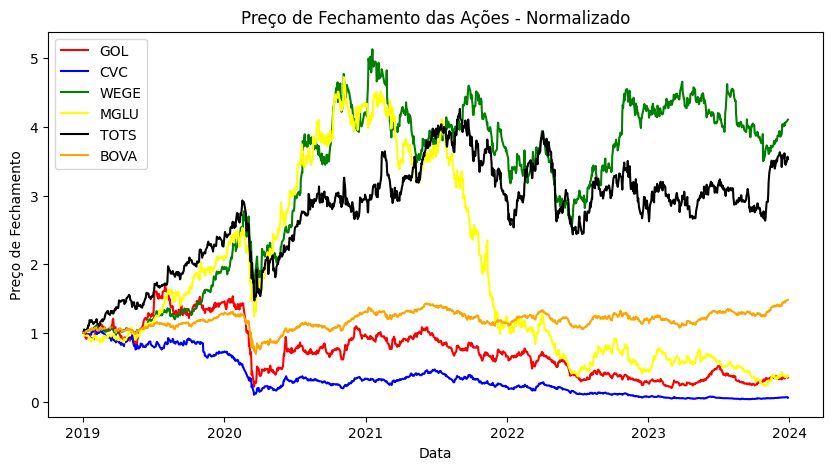

In [12]:
# Divida o valor de cada linha pelo primeiro valor do dataframe:
df_norm = df / df.iloc[0]

# Gráfico de Linha com Matplotlib:
plt.figure(figsize=(10,5))
plt.plot(df_norm['GOL'], color='red')
plt.plot(df_norm['CVC'], color='blue')
plt.plot(df_norm['WEGE'], color='green')
plt.plot(df_norm['MGLU'], color='yellow')
plt.plot(df_norm['TOTS'], color='black')
plt.plot(df_norm['BOVA'], color='orange')
plt.legend(['GOL', 'CVC', 'WEGE', 'MGLU', 'TOTS', 'BOVA'], loc='upper left')
plt.title('Preço de Fechamento das Ações - Normalizado')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.show()

In [43]:
df_norm

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
Date,,,,,,
2019-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-01-03,1.007073,0.993617,1.022803,0.989301,1.023037,1.001138
2019-01-04,0.982318,0.981178,1.034483,0.959191,1.051309,1.006826
2019-01-07,0.939096,0.993453,1.018354,0.974085,1.028621,1.006598
2019-01-08,0.926915,0.960884,1.010011,0.966235,0.986736,1.010580
...,...,...,...,...,...,...
2023-12-21,0.355992,0.064812,4.047831,0.359589,3.498782,1.460182
2023-12-22,0.359136,0.064812,4.061179,0.364751,3.446326,1.466894
2023-12-26,0.359921,0.065139,4.084539,0.363030,3.517666,1.474971


In [45]:
figura = px.line(title = 'Histórico do preço das ações')
for i in df.columns[1:]:
    figura.add_scatter(x=df.index, y=df[i], name=i)
figura.show()

In [46]:
figura = px.line(title = 'Histórico do preço das ações - Normalizado')
for i in df_norm.columns[1:]:
    figura.add_scatter(x=df_norm.index, y=df_norm[i], name=i)
figura.show()

# Taxa de Retorno de ações

### Teoria
- Taxa de retorno simples: <br>
    RS = (preço final - preço inicial) / preço inicial<br>
    (podemos adicionar o dividendo ao numerador)<br>
    
    Exemplo: Lucro de 100 ações:<br>
    Lucro = ((100 * preço inicial + 100 * dividendos - 100 * preço inicial)/ preço inicial) - preço inicial - taxa de compra - taxa de venda <br>

- Taxa de retorno diária: <br>
    RD = (preço hoje - preço ontem) / preço ontem <br>

- Taxa de retorno logarítmica: <br>
    RL = log (preço final / preço inicial) <br>


# Cálculo de risco de ações

### Teoria


In [15]:
df

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
Date,,,,,,
2019-01-02,25.450001,61.099998,8.990000,5.812187,9.531889,87.900002
2019-01-03,25.629999,60.709999,9.195000,5.750000,9.751472,88.000000
2019-01-04,25.000000,59.950001,9.300000,5.575000,10.020960,88.500000
2019-01-07,23.900000,60.700001,9.155000,5.661562,9.804704,88.480003
2019-01-08,23.590000,58.709999,9.080000,5.615937,9.405462,88.830002
...,...,...,...,...,...,...
2023-12-21,9.060000,3.960000,36.389999,2.090000,33.349998,128.350006
2023-12-22,9.140000,3.960000,36.509998,2.120000,32.849998,128.940002
2023-12-26,9.160000,3.980000,36.720001,2.110000,33.529999,129.649994
